In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

color_pal =  sns.color_palette()

dataroot = '../WaterLevelPredction_SelectingModel//Data/'

In [67]:
df=pd.read_csv(dataroot + 'WaterLevelData_ver4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4376 non-null   int64  
 1   month          4376 non-null   int64  
 2   day            4376 non-null   int64  
 3   water_level    4376 non-null   float64
 4   hour           4376 non-null   object 
 5   precipitation  623 non-null    float64
 6   sluice_status  4376 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 239.4+ KB


In [68]:
df.describe()

,year,month,day,water_level,precipitation
count,4376.000000,4376.000000,4376.000000,4376.000000,623.000000
mean,2018.502285,6.523995,15.726463,477.494022,12.016051
std,1.708732,3.451459,8.804253,2.952014,13.370935
min,2016.000000,1.000000,1.000000,467.000000,1.000000
25%,2017.000000,4.000000,8.000000,475.550000,4.000000
50%,2019.000000,7.000000,16.000000,478.300000,7.500000
75%,2020.000000,10.000000,23.000000,480.150000,15.000000
max,2021.000000,12.000000,31.000000,480.660000,88.000000


In [69]:
df.precipitation.fillna(0, inplace=True)

In [70]:
le = LabelEncoder()
df['sluice_status'] = le.fit_transform(df['sluice_status'])
df['hour'] = le.fit_transform(df['hour'])

In [71]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [72]:
df.tail(10)

,year,month,day,water_level,hour,precipitation,sluice_status,date
4366,2021,12,27,475.18,0,0.0,0,2021-12-27
4367,2021,12,27,475.18,1,0.0,0,2021-12-27
4368,2021,12,28,475.18,0,0.0,0,2021-12-28
4369,2021,12,28,475.18,1,0.0,0,2021-12-28
4370,2021,12,29,475.18,0,0.0,0,2021-12-29
4371,2021,12,29,475.18,1,0.0,0,2021-12-29
4372,2021,12,30,475.18,0,0.0,0,2021-12-30
4373,2021,12,30,475.17,1,0.0,0,2021-12-30
4374,2021,12,31,475.17,0,0.0,0,2021-12-31
4375,2021,12,31,475.17,1,0.0,0,2021-12-31


In [73]:
df.to_pickle(dataroot + 'finaldata.pkl')

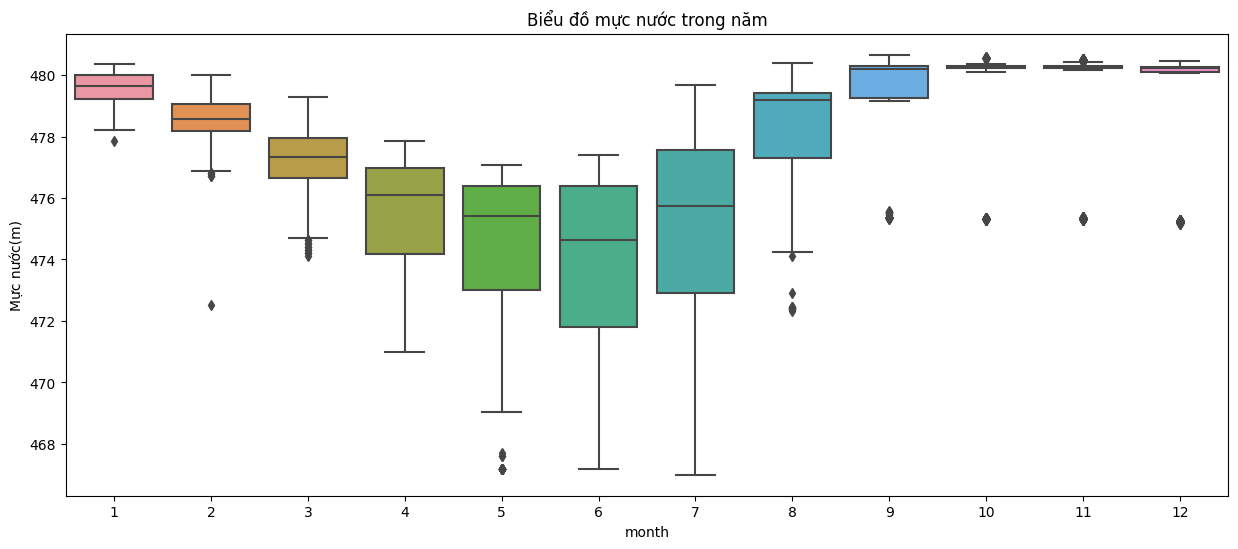

In [74]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='water_level', data=df)
plt.title('Biểu đồ mực nước trong năm')
plt.ylabel('Mực nước(m)')
plt.show()


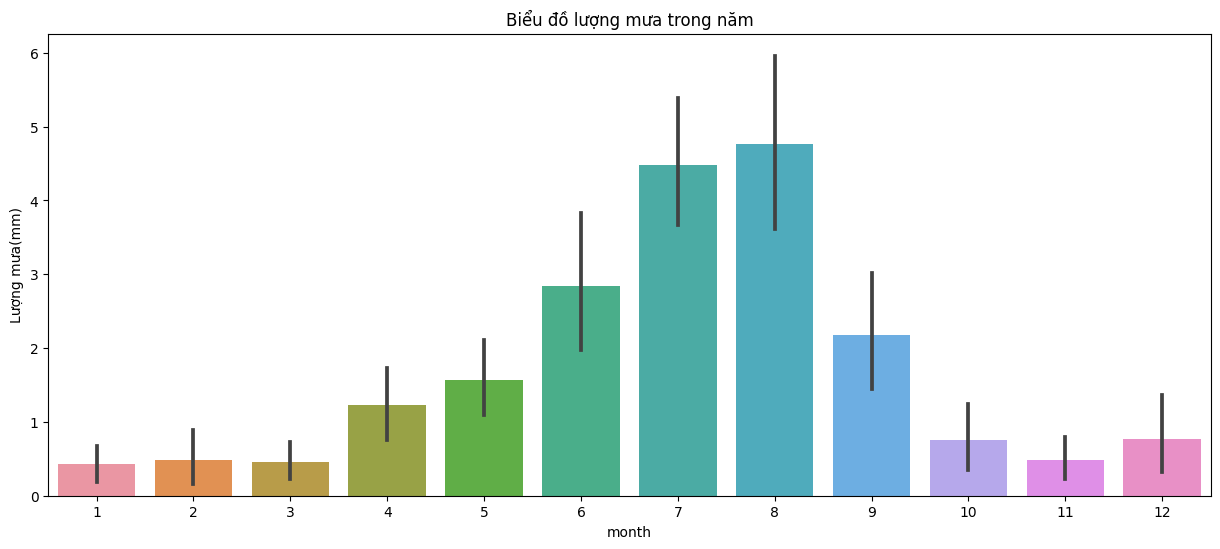

In [75]:
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='precipitation', data=df)
plt.title('Biểu đồ lượng mưa trong năm')
plt.ylabel('Lượng mưa(mm)')
plt.show()

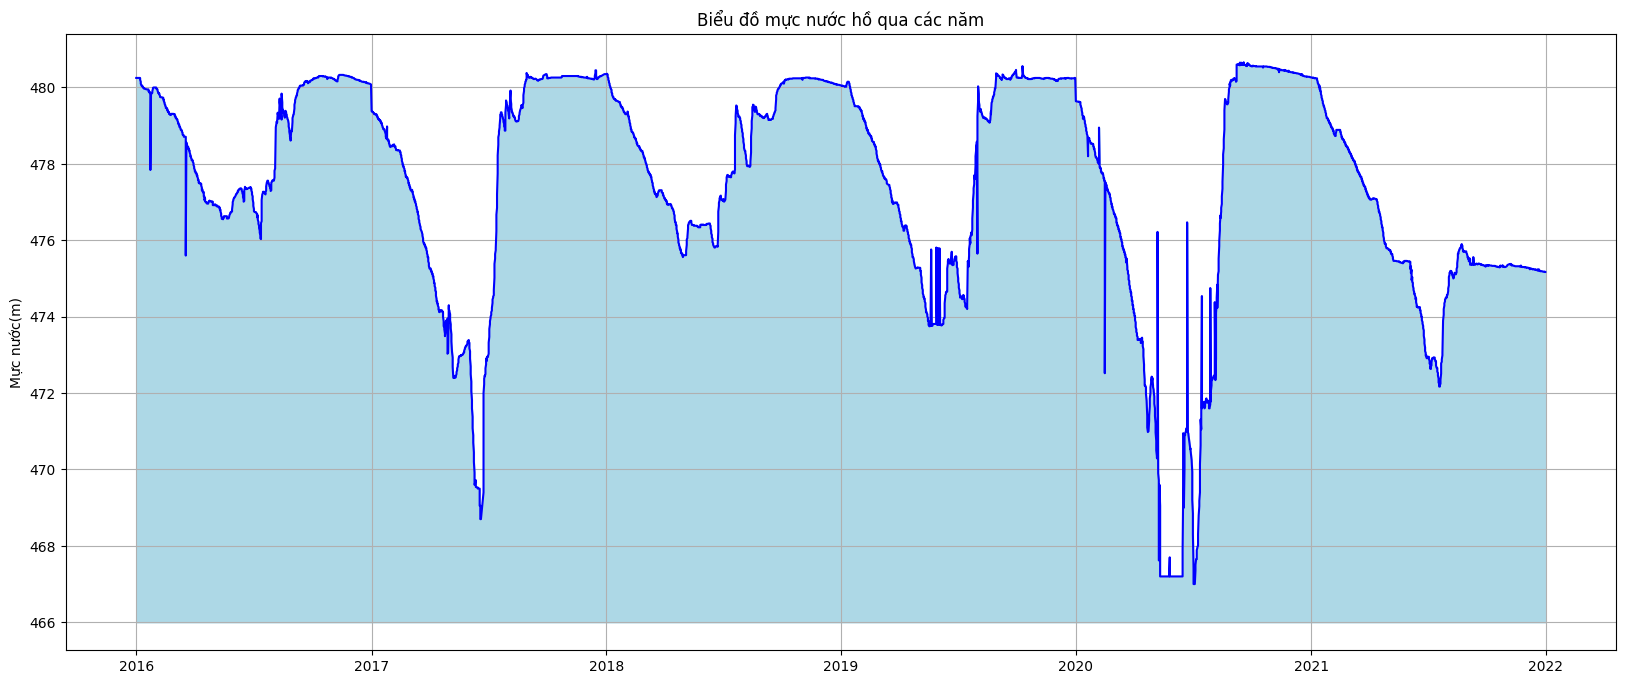

In [76]:
plt.figure(figsize=(20,8))

plt.title('Biểu đồ mực nước hồ qua các năm')

plt.plot(df['date'], df['water_level'], color='blue')

plt.fill_between(df['date'], 466, df['water_level'],color='lightblue')

plt.ylabel('Mực nước(m)')

plt.grid()
plt.show()

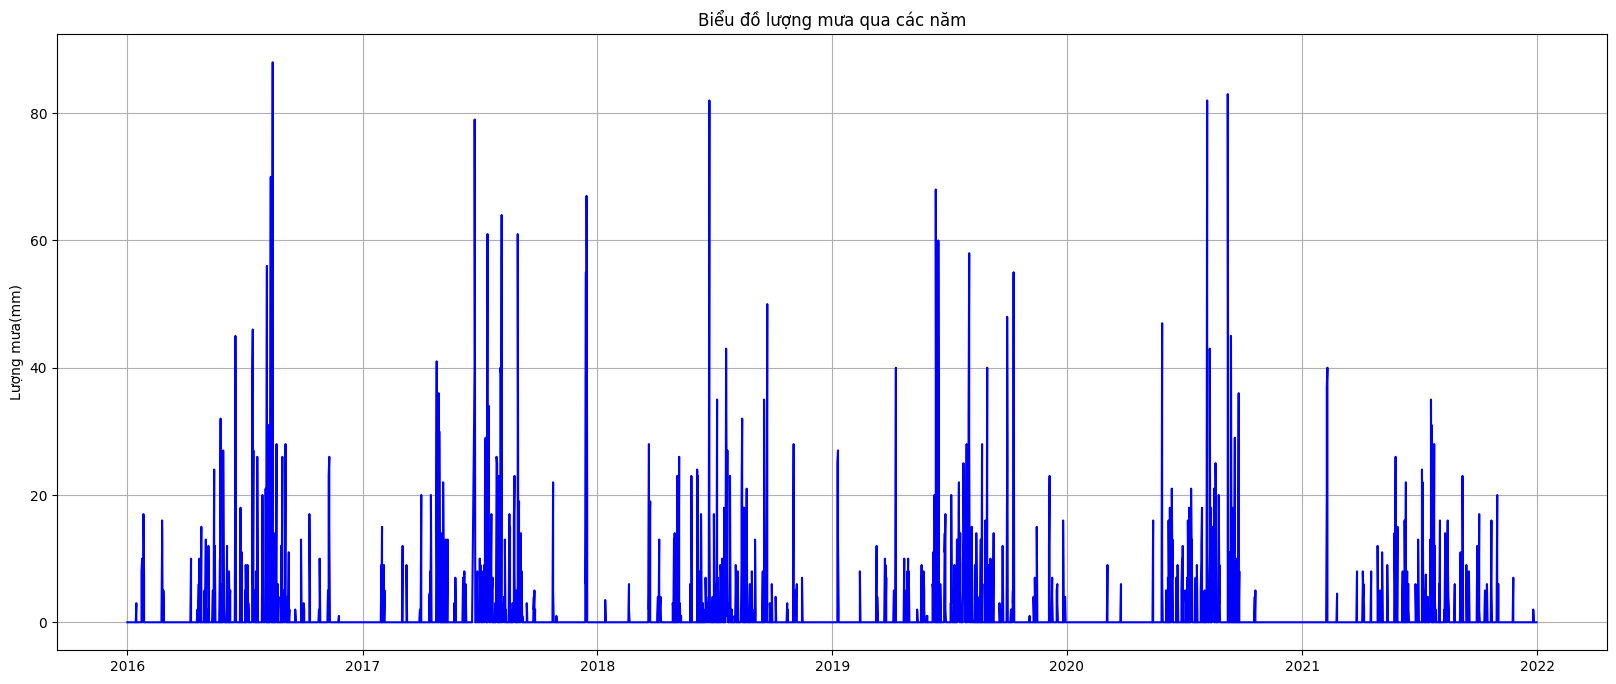

In [77]:
plt.figure(figsize=(20,8))

plt.title('Biểu đồ lượng mưa qua các năm')

plt.plot(df['date'], df['precipitation'], color='blue')

plt.ylabel('Lượng mưa(mm)')

plt.grid()
plt.show()